In [1]:
import pandas as pd

X = pd.read_csv("preprocessed_apartment_rentals.csv")

C:\Users\User\AppData\Local\Temp\ipykernel_12740\1528328078.py:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  X = pd.read_csv("preprocessed_apartment_rentals.csv")


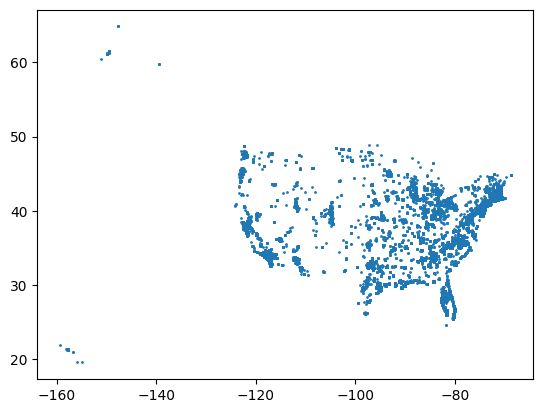

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X["longitude"], X["latitude"], s=1)

[1 4 0 ... 1 0 1]


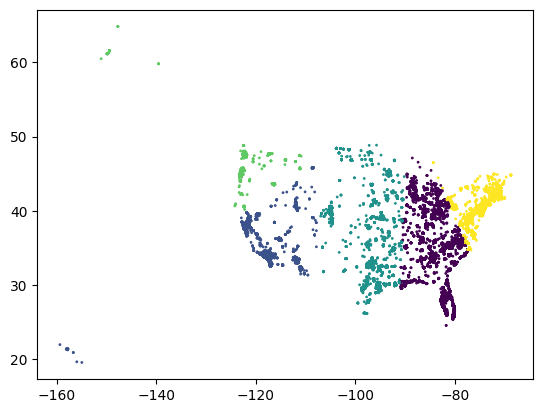

In [15]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=5)
kmeans.fit(X[["longitude", "latitude"]])
clusters = kmeans.labels_
print(kmeans.labels_)
plt.scatter(X["longitude"], X["latitude"], c=clusters, s=1)

In [19]:
one_hot_clusters = pd.get_dummies(clusters, prefix="cluster").astype(int)
X = pd.concat([X, one_hot_clusters], axis=1)
X.to_csv("preprocessed_apartment_rentals_clusters.csv", index=False)
